Flag = True
Blank = False

In [1]:
import csv
import sys
from casacore.tables import table
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import itertools
import numpy as np


In [34]:

MSfile = '/data/users/kyle/Mishas_Data/M83_GMM_Flag_Complex'

t = table(MSfile,readonly=False)
print('\nMS: ', MSfile, '\n')
print(t.summary)

# print MS columns
print('MS tables: ', t.colnames(), '\n')


Successful read/write open of default-locked table /data/users/kyle/Mishas_Data/M83_GMM_Flag_Complex: 23 columns, 115500 rows
('\nMS: ', '/data/users/kyle/Mishas_Data/M83_GMM_Flag_Complex', '\n')
<bound method table.summary of <casacore.tables.table.table object at 0x7fda8773cba8>>
('MS tables: ', ['UVW', 'FLAG', 'FLAG_CATEGORY', 'WEIGHT', 'SIGMA', 'ANTENNA1', 'ANTENNA2', 'ARRAY_ID', 'DATA_DESC_ID', 'EXPOSURE', 'FEED1', 'FEED2', 'FIELD_ID', 'FLAG_ROW', 'INTERVAL', 'OBSERVATION_ID', 'PROCESSOR_ID', 'SCAN_NUMBER', 'STATE_ID', 'TIME', 'TIME_CENTROID', 'DATA', 'WEIGHT_SPECTRUM'], '\n')


In [33]:

MSfile = '/data/users/kyle/Mishas_Data/M83_Flag'

t1 = table(MSfile,readonly=False)
print('\nMS: ', MSfile, '\n')
print(t1.summary)

# print MS columns
print('MS tables: ', t.colnames(), '\n')


Successful read/write open of default-locked table /data/users/kyle/Mishas_Data/M83_Flag: 23 columns, 115500 rows
('\nMS: ', '/data/users/kyle/Mishas_Data/M83_Flag', '\n')
<bound method table.summary of <casacore.tables.table.table object at 0x7fda86474f70>>
('MS tables: ', [], '\n')


In [196]:
import h5py
import numpy as np
with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_GMM_flagged_all.h5', 'r') as f:
    data_flag = f['rawdata']
    keys_flag = (list(data_flag.keys()))
    x_flag = np.empty([1100000,84])
    
    for i,n in enumerate(keys_flag):
        temp = data_flag.get(n)
        x_flag[:,i] = np.asarray(temp).flatten()


In [5]:
from numpy import genfromtxt
com = genfromtxt('/data/users/kyle/Mishas_Data/Specs/com.csv', delimiter=',')
A1 = genfromtxt('/data/users/kyle/Mishas_Data/Specs/A1.csv', delimiter=',')
A2 = genfromtxt('/data/users/kyle/Mishas_Data/Specs/A2.csv', delimiter=',')


In [27]:
data = np.ones((115500, 200, 4),dtype=bool) == 0

In [44]:
time_index=0
base_pol = 0
for i in range (0,com.shape[0]): #This is each baseline pair
    for j in range (0,4): #	This is polarizations
        time_index = 0
        a = or_flags[:,base_pol] == 0
        baseline = a.reshape(5500, 200)
        ant_1 = com[i,0]
        ant_2 = com[i,1]
        
        for k in range (0,len(A1)):
            if ((A1[k] == ant_1)and(A2[k]== ant_2)):
                data[k,:,j] =  baseline[time_index,:]
                time_index = time_index +1
                
        base_pol = base_pol +1

In [42]:
for i in range(0,data.shape[0]):
    flag = np.invert(data[i,:,:])
    t.putcell("FLAG",i,flag)

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [30]:
t.close()

In [35]:
data = t.getcol("DATA")
flag = t.getcol("FLAG")

data1 = t1.getcol("DATA")
flag1 = t1.getcol("FLAG")


In [36]:
c= 0
new_flag = np.empty((1100000, 84),dtype=bool)
new_data = np.empty((1100000, 84))

new_flag1 = np.empty((1100000, 84),dtype=bool)
new_data1 = np.empty((1100000, 84))

for i in range (0,com.shape[0]):
        for j in range (0,data.shape[2]):
            new_data[:,c] = ((data[(A1==com[i,0]) & (A2==com[i,1])][:,:,j]).flatten())
            new_flag[:,c] = ((flag[(A1==com[i,0]) & (A2==com[i,1])][:,:,j]).flatten())
            new_data1[:,c] = ((data1[(A1==com[i,0]) & (A2==com[i,1])][:,:,j]).flatten())
            new_flag1[:,c] = ((flag1[(A1==com[i,0]) & (A2==com[i,1])][:,:,j]).flatten())
            c = c+1
#             a[:,c] = (data[(A1==com[i,0]) & (A2==com[i,1])][:,:,j]).flatten()
#             c = c +1

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


In [26]:
or_flags = np.bitwise_or(new_flag1,new_flag)
or_flags

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False,  True, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

Text(0.5,1,'OR Flags')

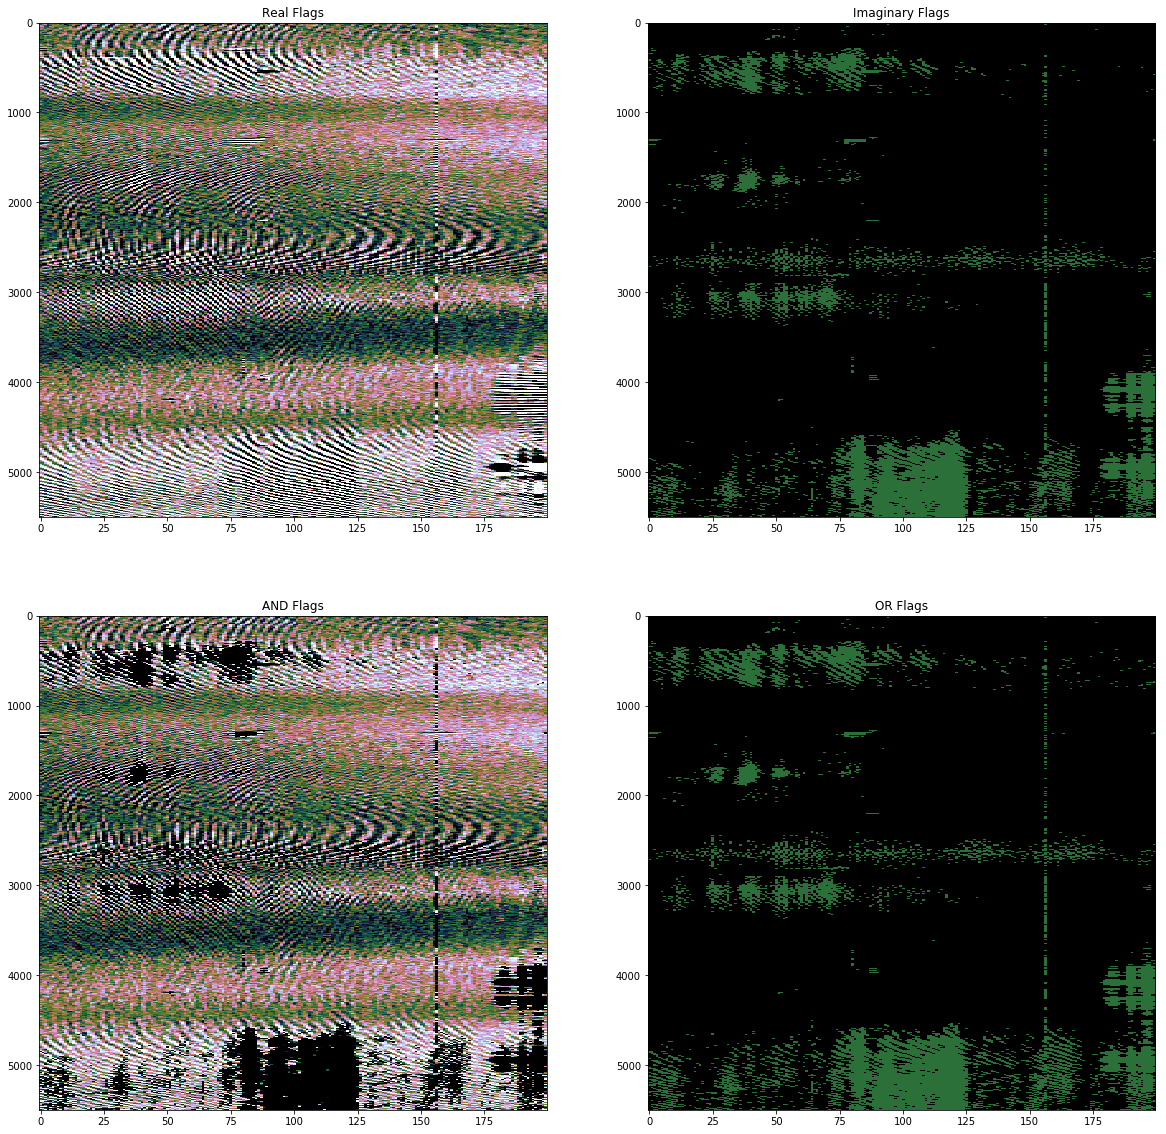

In [22]:
fig = plt.figure(figsize=(20,20))

palette = plt.cm.cubehelix

ax1 = fig.add_subplot(221)
im = ax1.imshow(new_data[:,0].reshape(5500,200), 
                aspect='auto',
                vmax=3,
                vmin=0,
                cmap=palette,
               )
ax1.set_title("Real Flags")

ax2 = fig.add_subplot(222)
im = ax2.imshow(new_flag[:,0].reshape(5500,200), 
                aspect='auto',
                 vmax=3,
                vmin=0,
                cmap=palette,
               )
ax2.set_title("Imaginary Flags")

ax3 = fig.add_subplot(223)
im = ax3.imshow(((new_flag[:,0]==0)*new_data[:,0]).reshape(5500,200),
                aspect='auto',
                vmax=3,
                vmin=0,
                cmap=palette,
               )
ax3.set_title("AND Flags")

ax4 = fig.add_subplot(224)
im = ax4.imshow((or_flags[:,0]).reshape(5500,200),
                 aspect='auto',
                vmax=3,
                vmin=0,
                cmap=palette,
               )
ax4.set_title("OR Flags")
